In [84]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from keras.preprocessing import sequence
from keras.datasets import imdb
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot
# fix random seed for reproducibility
numpy.random.seed(7)

In [2]:
df = pd.read_csv("fully_features.csv")
Y = pd.read_csv("all_our_annotations.csv", sep=":::")

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
all_data = df.merge(Y)
all_data = all_data.drop(['Unnamed: 0', 'char1', 'char2', 'Sentence'], axis=1)
y = all_data[['manualLabel', 'sequence', 'sid']]
x = all_data.drop(['manualLabel'], axis=1)

In [4]:
sequences_output = []
output = [[] for i in range(100)]
for index, row in y.iterrows():
    for s in range(1, 101):
        if row['manualLabel'] == 'p':
            label = 2
        elif row['manualLabel'] == 'u':
            label = 1
        elif row['manualLabel'] == 'n':
            label = 0
        if row['sequence'] == s:
            if s in sequences_output:
                i = sequences_output.index(s)
                output[i].append(label)
            else:
                sequences_output.append(s)
                i = sequences_output.index(s)
                output[i].append(label)
                

In [5]:
longest_output = 0
for l in output:
    if longest_output < len(l):
        longest_output = len(l)

longest_output

24

In [6]:
sequences_output = np.array(sequences_output)
output = np.array(output)
print(len(sequences_output), len(output.shape))
print(sequences_output[:5])
print(output[:5])

100 1
[1 2 3 4 5]
[list([2, 2, 2, 2, 2, 2, 2, 2, 2, 2]) list([0, 0, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0]) list([0, 0, 0, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0, 0])]


In [7]:
train_sequences_output, train_output = sequences_output[:80], output[:80]
test_sequences_output, test_output = sequences_output[80:], output[80:]

In [8]:
test_output = sequence.pad_sequences(test_output, maxlen=longest_output)
train_output = sequence.pad_sequences(train_output, maxlen=longest_output)

In [9]:
sequences_input = []
inputs = [np.array([]) for i in range(100)]
for index, row in x.iterrows():
    for s in range(1, 101):
        if row['sequence'] == s:
            if s in sequences_input:
                i = sequences_input.index(s)
                inputs[i] = np.append(inputs[i], row.values[2:]) 
            else:
                sequences_input.append(s)
                i = sequences_input.index(s)
                inputs[i] = np.append(inputs[i], row.values[2:]) 

In [10]:
longest_input = 0
for l in inputs:
    if longest_input < len(l):
        longest_input = len(l)

longest_input

240

In [11]:
sequences_input = np.array(sequences_input)
inputs = np.array(inputs)
print(len(sequences_input), len(inputs.shape))
print(sequences_input[:5])
print(inputs[:5])

100 1
[1 2 3 4 5]
[array([0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0, 0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 1.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
      dtype=object)
 array([0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0, 0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0], dtype=object)
 array([0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0, 0, 1.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 1.0, 1.0, 0, 0, 0.0, 0.0, 0

In [12]:
train_sequences_input, train_inputs = sequences_input[:80], inputs[:80]
test_sequences_input, test_inputs = sequences_input[80:], inputs[80:]

In [13]:
test_inputs = sequence.pad_sequences(test_inputs, maxlen=longest_input)
train_inputs = sequence.pad_sequences(train_inputs, maxlen=longest_input)

In [14]:
(train_sequences_output == train_sequences_input).sum()

80

In [15]:
train_inputs = train_inputs.reshape((train_inputs.shape[0], 1, train_inputs.shape[1]))
test_inputs = test_inputs.reshape((test_inputs.shape[0], 1, test_inputs.shape[1]))
# train_output = train_output.reshape((train_output.shape[0], 1, train_inputs.shape[1]))
# test_output = test_output.reshape((test_output.shape[0], 1, test_output.shape[1]))

Train on 80 samples, validate on 20 samples
Epoch 1/4
 - 4s - loss: 37.2899 - acc: 0.0375 - val_loss: 30.5651 - val_acc: 0.0000e+00
Epoch 2/4
 - 0s - loss: 37.1637 - acc: 0.0875 - val_loss: 30.4459 - val_acc: 0.0000e+00
Epoch 3/4
 - 0s - loss: 37.0194 - acc: 0.0625 - val_loss: 30.3055 - val_acc: 0.0000e+00
Epoch 4/4
 - 0s - loss: 36.8342 - acc: 0.1625 - val_loss: 30.1279 - val_acc: 0.0000e+00


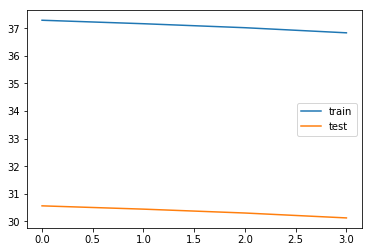

In [113]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_inputs.shape[1], train_inputs.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(train_output.shape[1], activation='softmax'))
# model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=2, mode='auto')
# fit network
history = model.fit(train_inputs, train_output, epochs=4, batch_size=15, validation_data=(test_inputs, test_output), verbose=2, shuffle=False, callbacks=[es])
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [96]:
print(test_inputs.shape)
print(train_output.shape)
print(train_inputs.shape)
print(test_output.shape)

(20, 1, 240)
(80, 24)
(80, 1, 240)
(20, 24)


In [114]:
# make a prediction
yhat = model.predict(test_inputs)

In [98]:
yhat.shape

(20, 24)

In [109]:
scores = model.evaluate(test_inputs, test_output, verbose=1)

20/20 [==============================] - 0s 204us/step


In [110]:
scores

[0.6669095754623413, 0.8020833134651184]

In [115]:
yhat

array([[0.04101577, 0.03937037, 0.04005147, 0.0406427 , 0.03753829,
        0.03953711, 0.04056536, 0.03897655, 0.04177367, 0.03892694,
        0.04039138, 0.03910809, 0.04090648, 0.04059402, 0.04059999,
        0.04019839, 0.04473227, 0.04270084, 0.0433534 , 0.04646766,
        0.04566354, 0.04589733, 0.04529675, 0.04569165],
       [0.04026691, 0.03931818, 0.03964147, 0.04040628, 0.03708543,
        0.03995737, 0.04119059, 0.03885381, 0.04145238, 0.03945063,
        0.04084352, 0.03963558, 0.04102303, 0.04084422, 0.04039605,
        0.04132358, 0.04353162, 0.04213717, 0.04303824, 0.04684282,
        0.04624276, 0.04510652, 0.04505305, 0.04635876],
       [0.04106673, 0.04015121, 0.04065046, 0.0406565 , 0.03934887,
        0.04058468, 0.04062077, 0.0403427 , 0.04122626, 0.03987231,
        0.04040426, 0.04057431, 0.04071646, 0.0406237 , 0.04113065,
        0.04144222, 0.04344924, 0.04273084, 0.04302834, 0.0445486 ,
        0.04389347, 0.04432538, 0.04412383, 0.04448821],
       [0.040